In [25]:
# average filter
def average_filter(prev_avg, new_data_point, k):
    alpha = (1 - 1/k)
    return alpha * prev_avg + (1 - alpha) * new_data_point

# moving average filter
def moving_average_filter(x_bar_k, x_k, x_k_n, n):
    return x_bar_k + (x_k - x_k_n) / n

# first-order low-pass filter
def first_order_low_pass_filter(x_bar_k, x_k, alpha):
    return alpha * x_bar_k + (1 - alpha) * x_k

In [26]:
# install dependencies
# !pip install numpy matplotlib

In [27]:
# import dependencies
import numpy as np
import matplotlib as plt

True


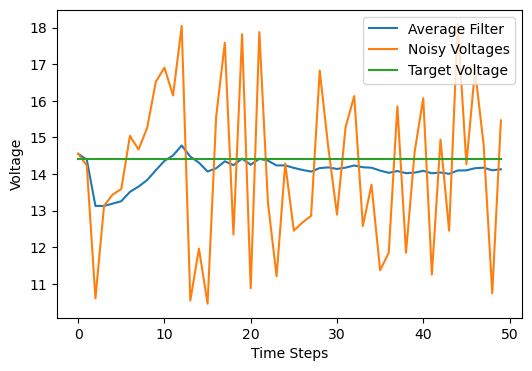

In [28]:
# average filter example: noisy voltage readings
# parameters
target = 14.4 # true voltage
dt = 0.2 # timestep
t = 10 # total time
numSamples = int(t / dt)

# generate noisy voltage readings
voltages = []
for _ in range(numSamples):
    noise = np.random.uniform(low=-4, high=4)
    voltages.append(target + noise)

# average filter loop
running_avg = 0
running_avgs = []
k = 1
for i, v in enumerate(voltages):
    k = i + 1
    running_avg = average_filter(running_avg, v, k)
    running_avgs.append(running_avg)


# make a list of targets the same size as voltages
targetArr = []
for _ in range(numSamples):
    targetArr.append(target)
    

print(np.isclose(running_avg, target, atol=0.5))

# plot voltage example
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(running_avgs, label = "Average Filter")
plt.plot(voltages, label="Noisy Voltages")
plt.plot(targetArr, label="Target Voltage")

plt.xlabel("Time Steps")
plt.ylabel("Voltage")
plt.legend()

plt.show()

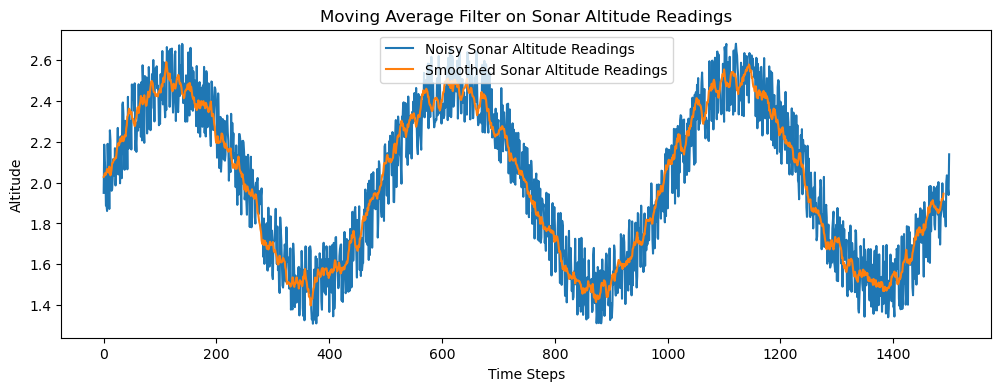

In [ ]:
# moving average filter example: reading noisy altitude data from sonar
# parameters
nSamples = 1500
x = np.zeros(nSamples)
dt = 0.02
t = np.arange(0, nSamples * dt, dt)
true_altitude = 2.0 + 0.5 * np.sin(2 * np.pi * 0.1 * t) 

# noise 
np.random.seed(42)
noise = np.random.uniform(-0.2, 0.2, size=nSamples)


readValues = true_altitude + noise
n = 10

smoothed = []
x_bar_k = np.mean(readValues[:n]) # initial average
# moving average filter loop
for i in range(n,nSamples):
    x_k = readValues[i]
    x_k_n = readValues[i - n]
    x_bar_k = moving_average_filter(x_bar_k, x_k, x_k_n, n)
    smoothed.append(x_bar_k)

# plot!


# plot voltage example
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.title("Moving Average Filter on Sonar Altitude Readings")
plt.plot(readValues, 'o', markersize=2, alpha=0.5, label="Noisy Sonar Altitude Readings")
plt.plot(smoothed, label="Smoothed Sonar Altitude Readings")

plt.xlabel("Time Steps")
plt.ylabel("Altitude")
plt.legend()

plt.show()

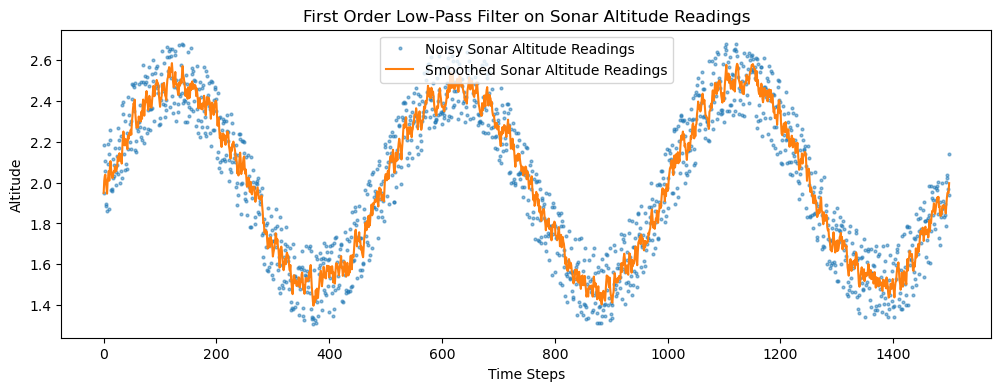

In [35]:
# first-order low-pass filter example: reading noisy altitude data from sonar

# parameters
nSamples = 1500
x = np.zeros(nSamples)
dt = 0.02
t = np.arange(0, nSamples * dt, dt)
true_altitude = 2.0 + 0.5 * np.sin(2 * np.pi * 0.1 * t) 

# noise 
np.random.seed(42)
noise = np.random.uniform(-0.2, 0.2, size=nSamples)


readValues = true_altitude + noise
n = 10

smoothed = []
x_bar_k = readValues[0]
alpha = .75
# moving average filter loop
for i in range(nSamples):
    x_k = readValues[i]
    x_bar_k = first_order_low_pass_filter(x_bar_k, x_k, alpha)
    smoothed.append(x_bar_k)

# plot!


# plot voltage example
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.title("First Order Low-Pass Filter on Sonar Altitude Readings")
plt.plot(readValues, 'o', markersize=2, alpha=0.5, label="Noisy Sonar Altitude Readings")
plt.plot(smoothed, label="Smoothed Sonar Altitude Readings")

plt.xlabel("Time Steps")
plt.ylabel("Altitude")
plt.legend()

plt.show()
